In [1]:
#Import all requird libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
new_data=pd.read_csv("Movie_regression_cleaned.xls")

In [3]:
new_data.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre',
       'Avg_age_actors', 'Num_multiplex', 'Collection'],
      dtype='object')

In [4]:
new_data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [5]:
# Applying statsmodels for full dataset
import statsmodels.api as smf

x=new_data.drop('Collection',axis=1)
y=new_data['Collection']

x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

olsModel = smf.OLS(y, x).fit()
print(olsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             Collection   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              610.4
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                   4.56e-306
Time:                        23:19:28   Log-Likelihood:                         -5425.5
No. Observations:                 506   AIC:                                  1.088e+04
Df Residuals:                     491   BIC:                                  1.094e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [6]:
# Splitting data into train test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [7]:
#OLS model Train dataset
olsModel = smf.OLS(y_train, X_train).fit()
print(olsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             Collection   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              541.4
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                   7.93e-250
Time:                        23:19:28   Log-Likelihood:                         -4311.4
No. Observations:                 404   AIC:                                      8653.
Df Residuals:                     389   BIC:                                      8713.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [8]:
# Refered from class notes 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attributes=["Marketing expense","Production expense","Multiplex coverage","Budget","Movie_length","Lead_ Actor_Rating","Lead_Actress_rating","Director_rating","Producer_rating","Critic_rating","Trailer_views","Time_taken","Twitter_hastags","Avg_age_actors","Num_multiplex"]
cat_attributes=["Genre","3D_available"]

num_pipeline = Pipeline([('standardize_num', StandardScaler())])
cat_pipeline = Pipeline([('categoricals', OrdinalEncoder())])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_attributes),
                                                      ('categories', cat_pipeline, cat_attributes)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('standardize_num',
                                                  StandardScaler())]),
                                 ['Marketing expense', 'Production expense',
                                  'Multiplex coverage', 'Budget',
                                  'Movie_length', 'Lead_ Actor_Rating',
                                  'Lead_Actress_rating', 'Director_rating',
                                  'Producer_rating', 'Critic_rating',
                                  'Trailer_views', 'Time_taken',
                                  'Twitter_hastags', 'Avg_age_actors',
                                  'Num_multiplex']),
                                ('categories',
                                 Pipeline(steps=[('categoricals',
                                                  OrdinalEncoder())]),
                                 ['Genre', '3D_available'])])


In [9]:
modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('lm', LinearRegression())])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Marketing expense',
                                                   'Production expense',
                                                   'Multiplex coverage',
                                                   'Budget', 'Movie_length',
                                                   'Lead_ Actor_Rating',
                                                   'Lead_Actress_rating',
                                                   'Director_rating',
                                                   'Producer_rating',
                                                   'Critic_rating',
                                                   'Trailer_views',
      

In [10]:
#Training data accuracy score 
modeling_pipeline.score(X_train, y_train)

0.7273919756333789

In [11]:
# Applying OLS regression for testing dataset
olsModel = smf.OLS(y_test, X_test).fit()
print(olsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             Collection   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              92.35
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                    1.01e-46
Time:                        23:19:28   Log-Likelihood:                         -1100.0
No. Observations:                 102   AIC:                                      2230.
Df Residuals:                      87   BIC:                                      2269.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [12]:
#Accuracy score for test dataset
modeling_pipeline.score(X_test, y_test)

0.5036705349903292

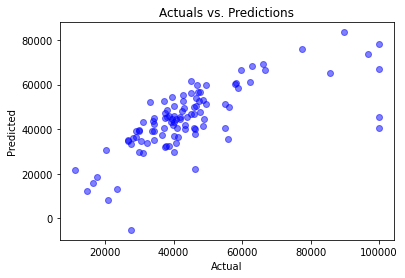

In [13]:
yhat_test = modeling_pipeline.predict(X_test)
plt.plot(y_test, yhat_test, 'bo', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actuals vs. Predictions')
plt.show()

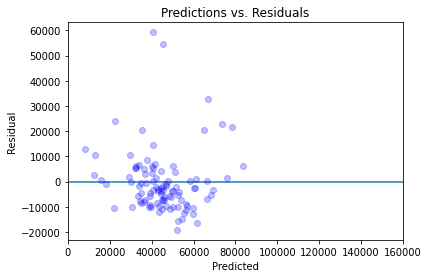

In [14]:
yhat_residuals = y_test - yhat_test
plt.plot(yhat_test, yhat_residuals, 'bo', alpha=0.25)
plt.hlines(0,0,160000)
plt.xlim(0,160000)
plt.title('Predictions vs. Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

#### Observations  
This is an average model, and it's evident that both the training and test datasets have lower accuracy.  
Error rate is also high


### Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=1))])
modeling_pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Marketing expense',
                                                   'Production expense',
                                                   'Multiplex coverage',
                                                   'Budget', 'Movie_length',
                                                   'Lead_ Actor_Rating',
                                                   'Lead_Actress_rating',
                                                   'Director_rating',
                                                   'Producer_rating',
                                                   'Critic_rating',
                                                   'Trailer_views',
      

In [16]:
modeling_pipeline_ridge.score(X_train, y_train)

0.7272550816506295

In [17]:
modeling_pipeline_ridge.score(X_test, y_test)

0.5032358151006799

In [18]:
modeling_pipeline_ridge['ridge'].coef_

array([-2106.24759829, -2517.1649091 ,  3314.70959544,  6517.05319168,
        -739.58963909,  1767.23868276, -2453.59727768,  1856.47394232,
        3976.15661051,  3176.19457047,  7049.31569437,   678.16581836,
         290.79467903,   658.03916609,   961.54780881,     0.        ,
           0.        ])

In [19]:
from collections import defaultdict
alpha_values=[0,1,5,10,20,50]
ridge_results = defaultdict(dict)
for alph in alpha_values:
    modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=alph))])
    modeling_pipeline_ridge.fit(X_train, y_train)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_train, y_train)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)

In [20]:
for alph in alpha_values:
    print(modeling_pipeline_ridge.score(X_train, y_train))

0.722622705367483
0.722622705367483
0.722622705367483
0.722622705367483
0.722622705367483
0.722622705367483


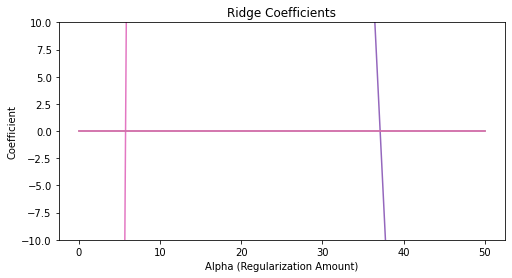

In [21]:
coefficients = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients = coefficients.reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(8,4),legend=False)
)

plt.title('Ridge Coefficients')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.ylim((-10, 10))
plt.show()

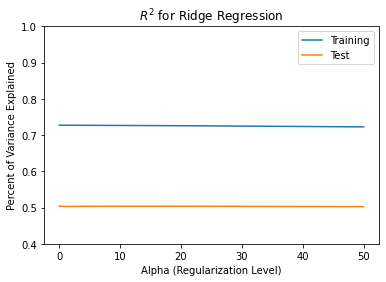

In [22]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()

In [23]:
from sklearn.linear_model import Lasso

alphas = [0, 1, 2, 5, 10, 50]

lasso_results = defaultdict(dict)

for i in alphas:
    modeling_pipeline_lasso = Pipeline([('data_processing', processing_pipeline), ('lasso', Lasso(alpha=i))])
    modeling_pipeline_lasso.fit(X_train, y_train)
    lasso_results['coefficients'][i] = modeling_pipeline_lasso['lasso'].coef_
    lasso_results['training score'][i] = modeling_pipeline_lasso.score(X_train, y_train)
    lasso_results['test score'][i] = modeling_pipeline_lasso.score(X_test, y_test)

C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18734425081.330738, tolerance: 13744529.693069309
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

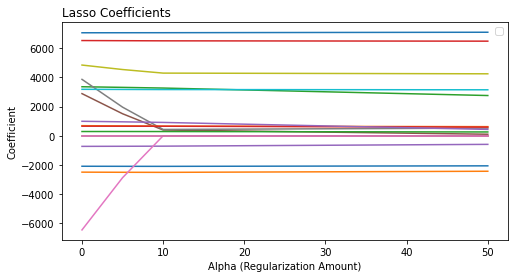

In [24]:
coefficients = pd.DataFrame.from_dict(lasso_results['coefficients'])
coefficients = coefficients.reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient').plot(figsize=(8,4))
plt.title('Lasso Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.legend('')
plt.show()


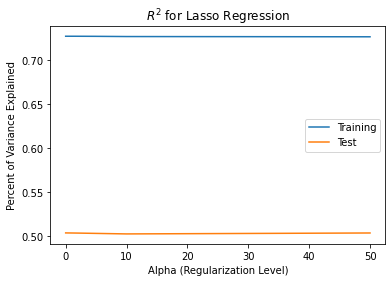

In [25]:
lasso_training_r2 = pd.Series(lasso_results['training score'])
lasso_test_r2 = pd.Series(lasso_results['test score'])

lasso_training_r2.plot()
lasso_test_r2.plot()
plt.title('$R^2$ for Lasso Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.show()

In [27]:
modeling_pipeline_lasso.score(X_train, y_train)

0.7267649719956953

In [26]:
modeling_pipeline_lasso.score(X_test, y_test)

0.5036026785552092

This model has 72% accuracy for train dataset and 50% accuracy for test dataset